# **IMPORTING THE LIBRARIES**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.metrics import roc_auc_score, recall_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

#**IMPORTING THE DATASET**

In [4]:
df = pd.read_csv('hypothyroid.csv')

In [5]:
df.head() #displays first 5 entries from the dataset

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


# **DATA CLEANING**

In [6]:
df.rename(columns={'binaryClass': 'label'}, inplace = True)
#renaming the column 'binaryClass' as 'label' which will be used for prediction

In [7]:
df.head(20)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,label
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P
5,18,F,t,f,f,f,f,f,f,f,...,t,183,t,1.3,t,141,f,?,other,P
6,59,F,f,f,f,f,f,f,f,f,...,t,72,t,0.92,t,78,f,?,other,P
7,80,F,f,f,f,f,f,f,f,f,...,t,80,t,0.7,t,115,f,?,SVI,P
8,66,F,f,f,f,f,f,f,f,f,...,t,123,t,0.93,t,132,f,?,SVI,P
9,68,M,f,f,f,f,f,f,f,f,...,t,83,t,0.89,t,93,f,?,SVI,P


In [8]:
df.shape
#displays the number of rows and columns in the dataset

(3772, 30)

In [9]:
df.dtypes
#displays the datatypes of the all the columns in the dataset
#Here, we can see the all the features are of object datatype

age                          object
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured                 object
TBG                         

In [10]:
df.columns
#displays the index of the columns in the dataset

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'label'],
      dtype='object')

In [11]:
# axis = 0 to drop(here) row wise and axis = 1 to do whatever column wise
#inplace = true means changes on that dataset only

In [12]:
df.drop(['on thyroxine', 'query on thyroxine','on antithyroid medication', 'query hypothyroid', 'query hyperthyroid', 'hypopituitary', 'psych', 'TSH measured','T3 measured', 'TT4 measured','T4U measured',
       'FTI measured', 'TBG measured', 'TBG', 'referral source'], axis = 1, inplace = True)
#Dropping the columns we do not need

In [13]:
df.head(20)

,age,sex,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,label
0,41,F,f,f,f,f,f,f,f,1.3,2.5,125,1.14,109,P
1,23,F,f,f,f,f,f,f,f,4.1,2,102,?,?,P
2,46,M,f,f,f,f,f,f,f,0.98,?,109,0.91,120,P
3,70,F,f,f,f,f,f,f,f,0.16,1.9,175,?,?,P
4,70,F,f,f,f,f,f,f,f,0.72,1.2,61,0.87,70,P
5,18,F,f,f,f,f,f,f,f,0.03,?,183,1.3,141,P
6,59,F,f,f,f,f,f,f,f,?,?,72,0.92,78,P
7,80,F,f,f,f,f,f,f,f,2.2,0.6,80,0.7,115,P
8,66,F,f,f,f,f,f,f,t,0.6,2.2,123,0.93,132,P
9,68,M,f,f,f,f,f,f,f,2.4,1.6,83,0.89,93,P


In [14]:
df.info()
#Gives us the more info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              3772 non-null   object
 1   sex              3772 non-null   object
 2   sick             3772 non-null   object
 3   pregnant         3772 non-null   object
 4   thyroid surgery  3772 non-null   object
 5   I131 treatment   3772 non-null   object
 6   lithium          3772 non-null   object
 7   goitre           3772 non-null   object
 8   tumor            3772 non-null   object
 9   TSH              3772 non-null   object
 10  T3               3772 non-null   object
 11  TT4              3772 non-null   object
 12  T4U              3772 non-null   object
 13  FTI              3772 non-null   object
 14  label            3772 non-null   object
dtypes: object(15)
memory usage: 442.2+ KB


In [15]:
df.replace('?', np.nan, inplace = True)
#After observing the dataset, we can see question marks which can be replaced by Nan using Numpy

In [16]:
df.head(100)

,age,sex,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,label
0,41,F,f,f,f,f,f,f,f,1.3,2.5,125,1.14,109,P
1,23,F,f,f,f,f,f,f,f,4.1,2,102,NaN,NaN,P
2,46,M,f,f,f,f,f,f,f,0.98,NaN,109,0.91,120,P
3,70,F,f,f,f,f,f,f,f,0.16,1.9,175,NaN,NaN,P
4,70,F,f,f,f,f,f,f,f,0.72,1.2,61,0.87,70,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,26,F,f,f,f,f,f,f,f,2,NaN,137,1.63,84,P
96,59,NaN,f,f,f,f,f,f,f,1.5,NaN,92,0.93,99,P
97,39,F,f,f,f,f,f,f,f,4.3,2.4,135,1.51,89,P
98,69,F,f,f,f,f,f,f,f,1.4,NaN,123,0.91,136,P


In [17]:
df['thyroid surgery'].value_counts()
#checking the unique values in the column thyroid surgery

f    3719
t      53
Name: thyroid surgery, dtype: int64

In [18]:
cols = ['age','FTI','TSH','T3','TT4','T4U']
for i in cols:
  df[i] = pd.to_numeric(df[i])

#Columns age,FTI,TSH,T3,TT4,T4U do appear as numeric but they have object datatype
#Hence, we have converted them to numeric by creating a list of column index and then running a for loop to convert each column values by their index to numeric datatype

In [19]:
df.info()
#here we can see age and the other columns we converted.Now they are float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3771 non-null   float64
 1   sex              3622 non-null   object 
 2   sick             3772 non-null   object 
 3   pregnant         3772 non-null   object 
 4   thyroid surgery  3772 non-null   object 
 5   I131 treatment   3772 non-null   object 
 6   lithium          3772 non-null   object 
 7   goitre           3772 non-null   object 
 8   tumor            3772 non-null   object 
 9   TSH              3403 non-null   float64
 10  T3               3003 non-null   float64
 11  TT4              3541 non-null   float64
 12  T4U              3385 non-null   float64
 13  FTI              3387 non-null   float64
 14  label            3772 non-null   object 
dtypes: float64(6), object(9)
memory usage: 442.2+ KB


In [20]:
df.isnull()
#Displays all the null values in the dataset

,age,sex,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,label
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False
3768,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3769,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3770,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
df.isnull().sum()
#Displays the count of all the null values in each column from the dataset

age                  1
sex                150
sick                 0
pregnant             0
thyroid surgery      0
I131 treatment       0
lithium              0
goitre               0
tumor                0
TSH                369
T3                 769
TT4                231
T4U                387
FTI                385
label                0
dtype: int64

Text(0.5, 1.0, 'Distribution of dataset Based on T3')

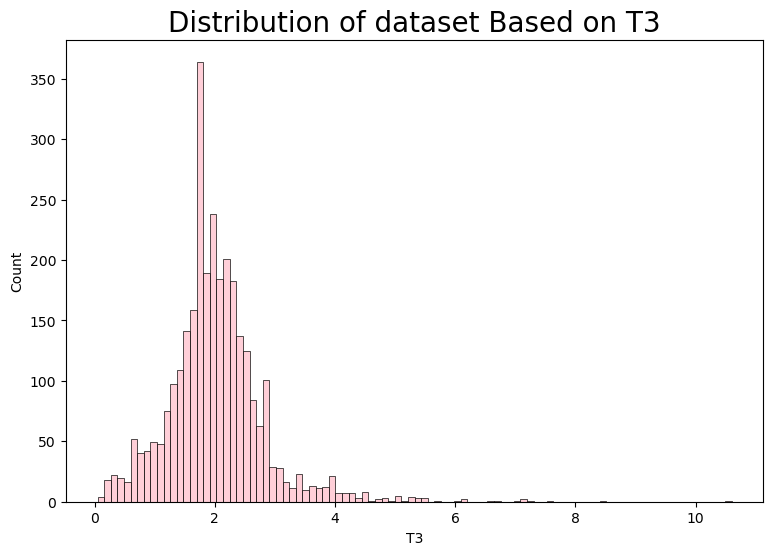

In [22]:
plt.figure(figsize=(9,6))
sns.histplot(x='T3',data=df,color='pink')
plt.title("Distribution of dataset Based on T3",{'fontsize':20})

#Plotting a histogram to check the distribution

In [23]:
miss_cols = ['TSH','T3','TT4','T4U','FTI']
for i in miss_cols:
  df[i] = df[i].fillna(df[i].mean())

#filling the missing values in the columns TSH,T3,TT4,T4U,FTI with the mean as they have missing values count which cannot be ignored
#NOTE: there is one missing value in age and 150 missing values in sex but they are relatively not that important to be replaced by their mean values

In [24]:
df.head()
#we can see the missing values have been replaced by their mean values

,age,sex,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,label
0,41.0,F,f,f,f,f,f,f,f,1.30,2.5000,125.0,1.140,109.000000,P
1,23.0,F,f,f,f,f,f,f,f,4.10,2.0000,102.0,0.995,110.469649,P
2,46.0,M,f,f,f,f,f,f,f,0.98,2.0135,109.0,0.910,120.000000,P
3,70.0,F,f,f,f,f,f,f,f,0.16,1.9000,175.0,0.995,110.469649,P
4,70.0,F,f,f,f,f,f,f,f,0.72,1.2000,61.0,0.870,70.000000,P


Text(0.5, 1.0, 'Distribution of dataset Based on T3')

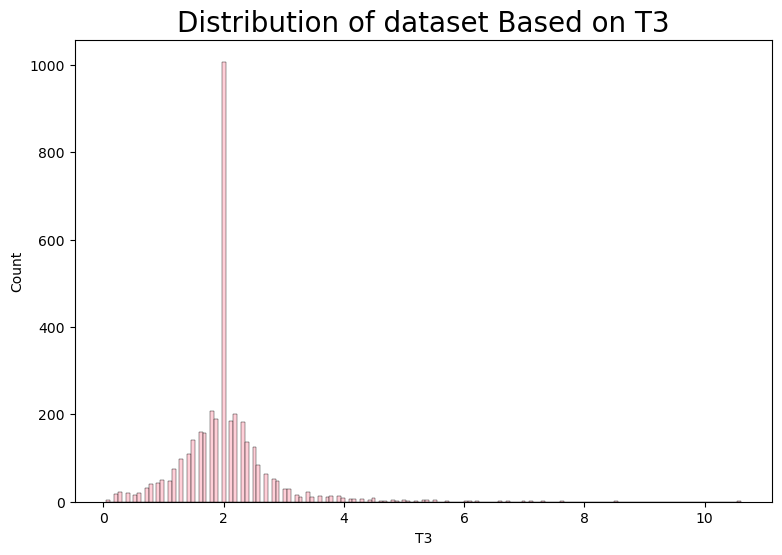

In [25]:
plt.figure(figsize=(9,6))
sns.histplot(x='T3',data=df,color='pink')
plt.title("Distribution of dataset Based on T3",{'fontsize':20})

#T3 distribution after replacing the missing values with their mean

In [26]:
df.isnull().sum()
#Here we can see all the columns with missing values except 'age' and 'sex' are replaced and now have no missing values

age                  1
sex                150
sick                 0
pregnant             0
thyroid surgery      0
I131 treatment       0
lithium              0
goitre               0
tumor                0
TSH                  0
T3                   0
TT4                  0
T4U                  0
FTI                  0
label                0
dtype: int64

In [27]:
df.dropna(inplace = True)
#But we can't keep the 'age' and 'sex' column with missing values
#So, we discard these missing values using dropna()

In [28]:
df.isnull().sum()
#Now,there are no null values

age                0
sex                0
sick               0
pregnant           0
thyroid surgery    0
I131 treatment     0
lithium            0
goitre             0
tumor              0
TSH                0
T3                 0
TT4                0
T4U                0
FTI                0
label              0
dtype: int64

In [29]:
df.head(10)

,age,sex,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,label
0,41.0,F,f,f,f,f,f,f,f,1.300000,2.5000,125.0,1.140,109.000000,P
1,23.0,F,f,f,f,f,f,f,f,4.100000,2.0000,102.0,0.995,110.469649,P
2,46.0,M,f,f,f,f,f,f,f,0.980000,2.0135,109.0,0.910,120.000000,P
3,70.0,F,f,f,f,f,f,f,f,0.160000,1.9000,175.0,0.995,110.469649,P
4,70.0,F,f,f,f,f,f,f,f,0.720000,1.2000,61.0,0.870,70.000000,P
5,18.0,F,f,f,f,f,f,f,f,0.030000,2.0135,183.0,1.300,141.000000,P
6,59.0,F,f,f,f,f,f,f,f,5.086766,2.0135,72.0,0.920,78.000000,P
7,80.0,F,f,f,f,f,f,f,f,2.200000,0.6000,80.0,0.700,115.000000,P
8,66.0,F,f,f,f,f,f,f,t,0.600000,2.2000,123.0,0.930,132.000000,P
9,68.0,M,f,f,f,f,f,f,f,2.400000,1.6000,83.0,0.890,93.000000,P


In [30]:
print(df.loc[df['age']>=400])
#finding the row with age more than 400 as age cannot be that big

        age sex sick pregnant thyroid surgery I131 treatment lithium goitre  \
1364  455.0   F    f        f               f              f       f      f   

     tumor  TSH   T3    TT4   T4U    FTI label  
1364     f  1.1  2.0  118.0  1.13  104.0     P  


In [31]:
df = df.drop(1364)
df
#deleting the row 1364 which we detected in the previous cell with more than usual age value

,age,sex,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,label
0,41.0,F,f,f,f,f,f,f,f,1.300000,2.5000,125.000000,1.140,109.000000,P
1,23.0,F,f,f,f,f,f,f,f,4.100000,2.0000,102.000000,0.995,110.469649,P
2,46.0,M,f,f,f,f,f,f,f,0.980000,2.0135,109.000000,0.910,120.000000,P
3,70.0,F,f,f,f,f,f,f,f,0.160000,1.9000,175.000000,0.995,110.469649,P
4,70.0,F,f,f,f,f,f,f,f,0.720000,1.2000,61.000000,0.870,70.000000,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,F,f,f,f,f,f,f,t,5.086766,2.0135,108.319345,0.995,110.469649,P
3768,68.0,F,f,f,f,f,f,f,f,1.000000,2.1000,124.000000,1.080,114.000000,P
3769,74.0,F,f,f,f,f,f,f,f,5.100000,1.8000,112.000000,1.070,105.000000,P
3770,72.0,M,f,f,f,f,f,f,f,0.700000,2.0000,82.000000,0.940,87.000000,P


In [32]:
df.age = df.age.astype(int)
df.TT4 = df.TT4.astype(int)
df.FTI = df.FTI.astype(int)

#columns 'age','TT4','FTI' can be converted to int type

In [33]:
df.head()

,age,sex,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,label
0,41,F,f,f,f,f,f,f,f,1.30,2.5000,125,1.140,109,P
1,23,F,f,f,f,f,f,f,f,4.10,2.0000,102,0.995,110,P
2,46,M,f,f,f,f,f,f,f,0.98,2.0135,109,0.910,120,P
3,70,F,f,f,f,f,f,f,f,0.16,1.9000,175,0.995,110,P
4,70,F,f,f,f,f,f,f,f,0.72,1.2000,61,0.870,70,P


In [34]:
df.dtypes

age                  int32
sex                 object
sick                object
pregnant            object
thyroid surgery     object
I131 treatment      object
lithium             object
goitre              object
tumor               object
TSH                float64
T3                 float64
TT4                  int32
T4U                float64
FTI                  int32
label               object
dtype: object

**# Generating a new cleaned CSV file**

In [35]:
df.to_csv('cleaned_thyroid_dataset.csv')
#We have generated a new csv file after cleaning

# **EDA**

In [36]:
cdf = pd.read_csv('cleaned_thyroid_dataset.csv')
#importing cleaned data set as cdf

In [37]:
cdf

,Unnamed: 0,age,sex,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,label
0,0,41,F,f,f,f,f,f,f,f,1.300000,2.5000,125,1.140,109,P
1,1,23,F,f,f,f,f,f,f,f,4.100000,2.0000,102,0.995,110,P
2,2,46,M,f,f,f,f,f,f,f,0.980000,2.0135,109,0.910,120,P
3,3,70,F,f,f,f,f,f,f,f,0.160000,1.9000,175,0.995,110,P
4,4,70,F,f,f,f,f,f,f,f,0.720000,1.2000,61,0.870,70,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3615,3767,30,F,f,f,f,f,f,f,t,5.086766,2.0135,108,0.995,110,P
3616,3768,68,F,f,f,f,f,f,f,f,1.000000,2.1000,124,1.080,114,P
3617,3769,74,F,f,f,f,f,f,f,f,5.100000,1.8000,112,1.070,105,P
3618,3770,72,M,f,f,f,f,f,f,f,0.700000,2.0000,82,0.940,87,P


In [38]:
cdf = cdf.drop(['Unnamed: 0'], axis=1)

Countplot of the Target variable with 'P' and 'N' as 'Positive' and 'Negative respectively'

Text(0.5, 1.0, 'Count Plot for Target Varbiale')

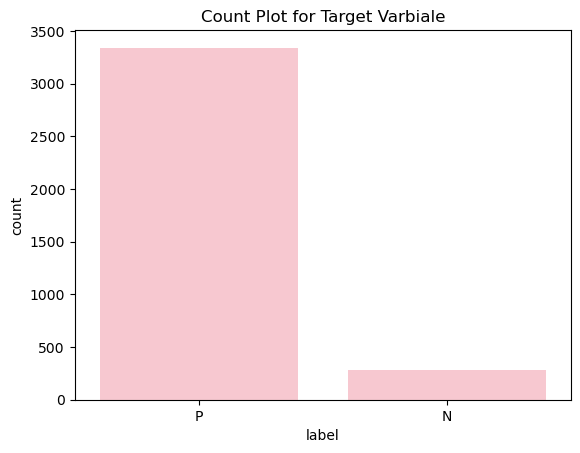

In [39]:
sns.countplot(x = 'label', data = cdf, color = 'pink')
plt.title('Count Plot for Target Varbiale')

In [40]:
cpdf = cdf[cdf.label == 'P']
#creating a new data frame as cpdf which contains only positive "P" values from "label"

Histogram of the Positive class based on Age.

*Basically how the positive cases vary according to age*

Text(0.5, 1.0, 'Distribution of Positive Class based on Age')

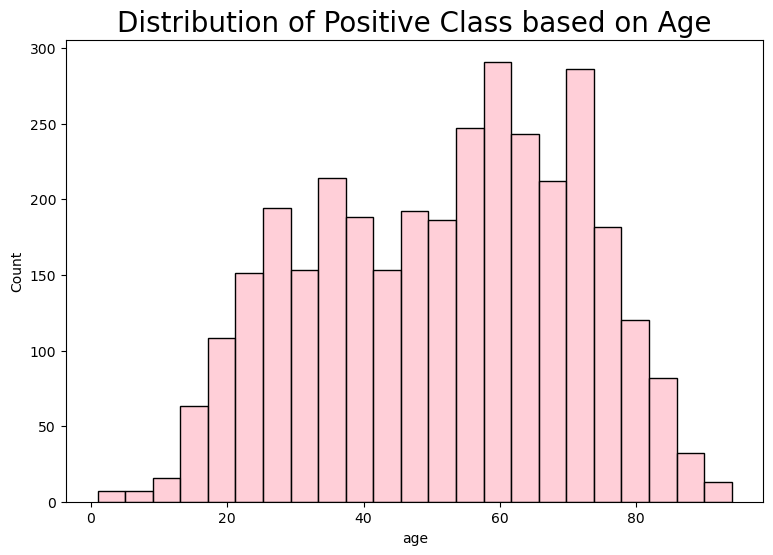

In [41]:
plt.figure(figsize = (9,6))
sns.histplot(x = 'age', data = cpdf, color = 'pink')
plt.title('Distribution of Positive Class based on Age', {'fontsize': 20})

Pie chart representing the percentage of positive cases in both Females and Males

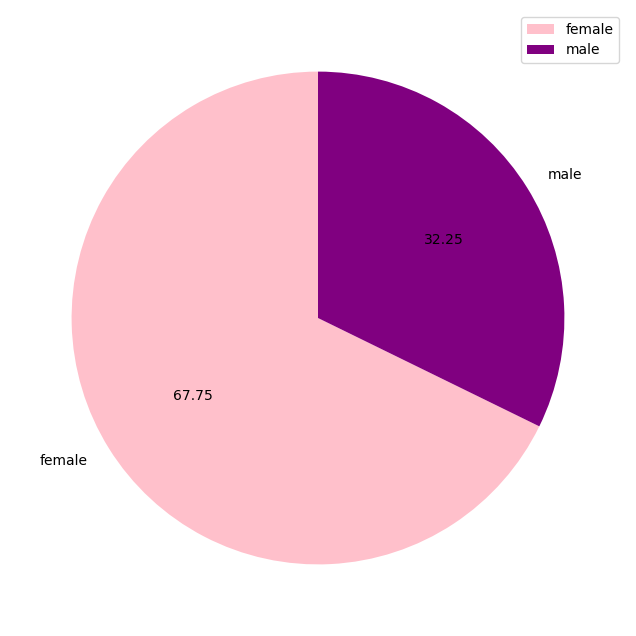

In [42]:
plt.figure(figsize = (10,8))
plt.pie(x = cpdf.sex.value_counts(),
        labels = ['female','male'],
        startangle = 90,
        colors =['pink','purple'],
        autopct = '%.2f'
        )
plt.legend()

Pie chart representing the percentage of sick and non sick people who are positive

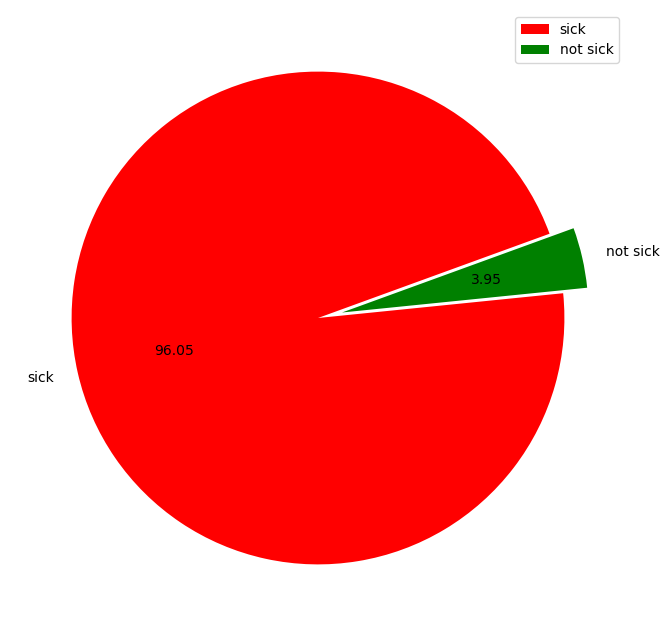

In [43]:
plt.figure(figsize = (10,8))
plt.pie(x = cpdf.sick.value_counts(),
        labels = ['sick','not sick'],
        startangle = 20,
        colors = ['red','green'],
        autopct = '%.2f',
        explode = [0,0.1]
        )
plt.legend()

In [44]:
cdf.head()

,age,sex,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,label
0,41,F,f,f,f,f,f,f,f,1.30,2.5000,125,1.140,109,P
1,23,F,f,f,f,f,f,f,f,4.10,2.0000,102,0.995,110,P
2,46,M,f,f,f,f,f,f,f,0.98,2.0135,109,0.910,120,P
3,70,F,f,f,f,f,f,f,f,0.16,1.9000,175,0.995,110,P
4,70,F,f,f,f,f,f,f,f,0.72,1.2000,61,0.870,70,P


In [45]:
counts = cpdf.sex.value_counts()
print("Total number of positive females: ",counts)
female_counts = 2263

Total number of positive females:  F    2263
M    1077
Name: sex, dtype: int64


In [46]:
#data = pd.read_csv('your_dataset.csv')

filtered_data = cpdf[(cpdf['sex'] == 'F') & (cpdf['pregnant'] == 'f')]
non_pregnant_female_count = filtered_data.shape[0]
pregnant_female_counts = (female_counts) - (non_pregnant_female_count)

print("Count of females who are not pregnant:",non_pregnant_female_count)
print("Count of females who are pregnant: ",pregnant_female_counts)

Count of females who are not pregnant: 2212
Count of females who are pregnant:  51


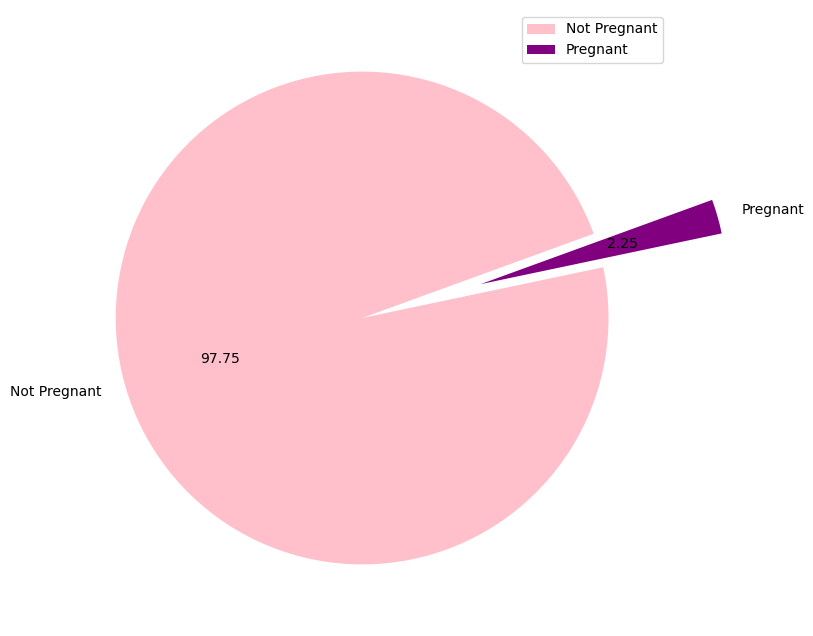

In [47]:
count_list = [non_pregnant_female_count,female_counts-non_pregnant_female_count]
label_list = ['Not Pregnant','Pregnant']
colors_list = ['pink','purple']
explode_list = [0,0.5]


plt.figure(figsize =(10,8))
plt.pie(count_list,
        labels = label_list,
        startangle = 20,
        colors = colors_list,
        autopct = '%.2f',
        explode = explode_list)
plt.legend()

In [48]:
cpdf.columns

Index(['age', 'sex', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment',
       'lithium', 'goitre', 'tumor', 'TSH', 'T3', 'TT4', 'T4U', 'FTI',
       'label'],
      dtype='object')

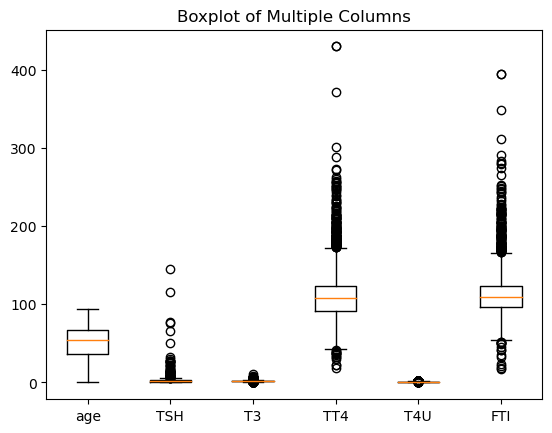

In [49]:
columns_to_plot = ['age','TSH', 'T3', 'TT4','T4U', 'FTI']
plt.boxplot(cpdf[columns_to_plot])
plt.xticks(range(1, len(columns_to_plot) + 1), columns_to_plot)
plt.title('Boxplot of Multiple Columns')
plt.show()

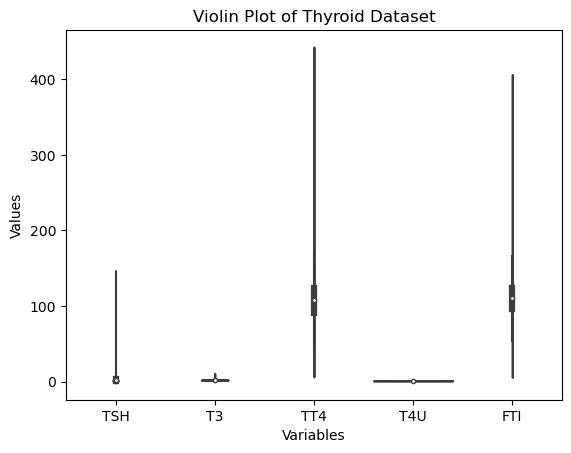

In [50]:
columns_to_plot = ['TSH', 'T3', 'TT4', 'T4U', 'FTI']

# Create the violin plot using seaborn
sns.violinplot(data=cpdf[columns_to_plot])

# Add labels and title
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Violin Plot of Thyroid Dataset')

# Display the violin plot
plt.show()

# **ENCODING**

In [51]:
#coverting the non numerical to numerical ones (like f is for false to a numeric value)

In [52]:
X =  cdf.drop('label',axis = 1)
y = cdf.label

In [53]:
s_encoder = LabelEncoder()
si_encoder = LabelEncoder()
preg_encoder = LabelEncoder()
ts_encoder = LabelEncoder()
li_encoder = LabelEncoder()
g_encoder = LabelEncoder()
treat_encoder = LabelEncoder()
tu_encoder = LabelEncoder()


In [54]:
X['sex'] = s_encoder.fit_transform(X.sex)
X['sick'] = si_encoder.fit_transform(X.sick)
X['pregnant'] = preg_encoder.fit_transform(X.pregnant)
X['thyroid surgery'] = ts_encoder.fit_transform(X['thyroid surgery'])
X['lithium'] = li_encoder.fit_transform(X.lithium)
X['goitre'] = g_encoder.fit_transform(X.goitre)
X['I131 treatment'] = treat_encoder.fit_transform(X['I131 treatment'])
X['tumor'] = tu_encoder.fit_transform(X.tumor)

In [55]:
y.head()

0    P
1    P
2    P
3    P
4    P
Name: label, dtype: object

In [56]:
def func(cdf) :
  if cdf == 'P' :
    return 1
  else :
    return 0

In [57]:
y=y.apply(func) #we could use label encoder also but we chose to save computational cost y pratik

In [58]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [59]:
cdf.dtypes

age                  int64
sex                 object
sick                object
pregnant            object
thyroid surgery     object
I131 treatment      object
lithium             object
goitre              object
tumor               object
TSH                float64
T3                 float64
TT4                  int64
T4U                float64
FTI                  int64
label               object
dtype: object

# **SPLITTING THE DATA INTO TRAINING DATA AND TESTING DATA**

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 42)

# **HANDLE IMBALANCED DATA**

In [61]:
smote = SMOTE(random_state = 11)
x_smote, y_smote = smote.fit_resample(X_train, y_train)

In [62]:
print('shape before oversampling:', X_train.shape)
print('shape after oversampling', x_smote.shape)
#too much majoruty value like so many positive here so smote creates extra sample

shape before oversampling: (2896, 14)
shape after oversampling (5350, 14)


# **SCALING (NORMALIZATION)**

In [63]:
#sc = MinMaxScaler()
# x_smote.TT4 = sc.fit_transform(x_smote[['TT4']])
# x_smote.age = sc.fit_transform(x_smote[['age']])
# x_smote.FTI = sc.fit_transform(x_smote[['FTI']])
#SCALING MEANS TO GET THE DATA IN A RANGE SORT OF BY USIN G NORMALIZATION AS METHOD, FUNCTION MIN MAX SCALER DOES 0  to 1 ka range
#doubt is why the didnt covert t3 tsh etc

In [64]:
X_test.head()

,age,sex,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI
2943,84,0,0,0,0,0,0,0,0,4.6,1.5,83,0.780,106
2962,52,1,0,0,0,0,0,0,0,1.1,2.7,159,1.190,134
1073,64,1,0,0,0,0,0,0,0,1.0,0.7,91,0.830,110
1583,23,1,0,0,0,0,0,0,0,1.3,1.8,122,1.100,111
1653,34,0,0,0,0,0,0,0,0,3.1,1.8,94,0.995,110


In [65]:
#X_test[['TT4', 'age', 'FTI']] = sc.transform(X_test[['TT4', 'age', 'FTI']])


In [66]:
# x_smote['age'] = (x_smote['age'] - x_smote['age'].min()) / (x_smote['age'].max() - x_smote['age'].min())
# x_smote['TT4'] = (x_smote['TT4'] - x_smote['TT4'].min()) / (x_smote['TT4'].max() - x_smote['TT4'].min())
# x_smote['FTI'] = (x_smote['FTI'] - x_smote['FTI'].min()) / (x_smote['FTI'].max() - x_smote['FTI'].min())

In [67]:
# X_test['age'] = (X_test['age'] - X_test['age'].min()) / (X_test['age'].max() - X_test['age'].min())
# X_test['TT4'] = (X_test['TT4'] - X_test['TT4'].min()) / (X_test['TT4'].max() - X_test['TT4'].min())
# X_test['FTI'] = (X_test['FTI'] - X_test['FTI'].min()) / (X_test['FTI'].max() - X_test['FTI'].min())

In [68]:
x_smote.head()

,age,sex,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI
0,52,1,0,0,0,0,0,0,0,0.300000,1.2000,101,0.90,112
1,78,0,0,0,0,0,0,0,0,10.000000,2.0000,69,0.96,71
2,23,0,0,0,0,0,0,0,0,5.086766,2.0135,67,0.98,68
3,71,1,0,0,0,0,0,0,0,25.000000,0.3000,31,0.68,46
4,79,0,0,0,0,0,0,0,0,0.840000,0.8000,94,0.86,109


In [69]:
x_smote.dtypes

age                  int64
sex                  int32
sick                 int32
pregnant             int32
thyroid surgery      int32
I131 treatment       int32
lithium              int32
goitre               int32
tumor                int32
TSH                float64
T3                 float64
TT4                  int64
T4U                float64
FTI                  int64
dtype: object

In [70]:
X_test.dtypes

age                  int64
sex                  int32
sick                 int32
pregnant             int32
thyroid surgery      int32
I131 treatment       int32
lithium              int32
goitre               int32
tumor                int32
TSH                float64
T3                 float64
TT4                  int64
T4U                float64
FTI                  int64
dtype: object

In [71]:
X_test.columns

Index(['age', 'sex', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment',
       'lithium', 'goitre', 'tumor', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'],
      dtype='object')

# **PIPELINE**

In [72]:

# Define the steps of the pipeline as a list of tuples
# Each tuple consists of a string (step name) and an estimator object
steps = [
    ('scaler', MinMaxScaler()),          # Data preprocessing step with MinMaxScaler
    ('classifier', xgb.XGBClassifier()) # Model training
    #step  put knn
]

# Create the pipeline
pipeline = Pipeline(steps)


# xgbc = xgb.XGBClassifier()
# xgbc.fit(x_smote,y_smote)

In [73]:
# Fit the pipeline on the training data
pipeline.fit(x_smote, y_smote)

# Predict using the pipeline
y_pred = pipeline.predict(X_test)

# Evaluate the pipeline's performance
accuracy = pipeline.score(X_test, y_test)


In [74]:
accuracy

0.9751381215469613

# **MODEL BUILDING**

In [75]:
  #Checking the Scores

def check_scores(model, x_smote, X_test):
  # Making predictions on train and test data

   train_class_preds = model.predict(x_smote)
   test_class_preds = model.predict(X_test)


  # Get the probabilities on train and test
   train_preds = model.predict_proba(x_smote)[:,1]
   test_preds = model.predict_proba(X_test)[:,1]


  # Calculating accuracy on train and test
   train_accuracy = accuracy_score(y_smote,train_class_preds)
   test_accuracy = accuracy_score(y_test,test_class_preds)

   print("The accuracy on train dataset is", train_accuracy)
   print("The accuracy on test dataset is", test_accuracy)
   print()

   # Get the confusion matrices for train and test
   train_cm = confusion_matrix(y_smote,train_class_preds)
   test_cm = confusion_matrix(y_test,test_class_preds )

   print('Train confusion matrix:')
   print( train_cm)
   print()
   print('Test confusion matrix:')
   print(test_cm)
   print()

  # Get the roc_auc score for train and test dataset
   train_auc = roc_auc_score(y_smote,train_preds)
   test_auc = roc_auc_score(y_test,test_preds)

   print('AUC on train data:', train_auc)
   print('AUC on test data:', test_auc)

  # Fscore, precision and recall on test data
   f1 = f1_score(y_test, test_class_preds)
   precision = precision_score(y_test, test_class_preds)
   recall = recall_score(y_test, test_class_preds)
   print("F1 score is:",f1 )
   print("Precision is:",precision)
   print("Recall is:", recall)

   return model, train_auc, test_auc, train_accuracy, test_accuracy,f1, precision,recall###Checking the Scores

In [76]:
# models = {LogisticRegression(max_iter=500) : 'logistic regression',
#           SVC() : 'suppport vector machine',
#           RandomForestClassifier() : ' random forest'}
# for m in models.keys() :
#   m.fit(x_smote,y_smote)
# for model , name in models.items() :
#   print(f'accuracy score for {name} is :', model.score(X_test,y_test)*100,'%' )

In [77]:
# for model, name in models.items() :
#   y_predict = model.predict(X_test)
#   print(f'classification report for {name}')
#   print('________________________________________________________\n')
#   print(classification_report(y_test,y_predict,digits=4))
#   print('________________________________________________________\n')
#   print(confusion_matrix(y_test,y_predict))
#   print('________________________________________________________\n')

# **KNN**

In [78]:
knnc = KNeighborsClassifier(n_neighbors = 8)
knnc.fit(x_smote,y_smote)
pred_knnc = knnc.predict(X_test)
accuracy_score(pred_knnc,y_test)

0.925414364640884

In [79]:
X_test

,age,sex,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI
2943,84,0,0,0,0,0,0,0,0,4.600000,1.5000,83,0.780,106
2962,52,1,0,0,0,0,0,0,0,1.100000,2.7000,159,1.190,134
1073,64,1,0,0,0,0,0,0,0,1.000000,0.7000,91,0.830,110
1583,23,1,0,0,0,0,0,0,0,1.300000,1.8000,122,1.100,111
1653,34,0,0,0,0,0,0,0,0,3.100000,1.8000,94,0.995,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3151,52,1,0,0,0,1,0,0,0,1.200000,1.7000,92,0.760,121
1457,35,1,0,0,0,0,0,0,0,2.500000,2.0135,139,1.130,123
2290,24,0,0,0,0,0,0,0,0,5.086766,2.0135,108,0.995,110
528,23,0,0,0,0,0,0,0,0,7.200000,3.5000,126,1.380,92


In [80]:
pred_knnc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [81]:
np.array(y_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [82]:
print(confusion_matrix(y_test,pred_knnc))

[[ 46  13]
 [ 41 624]]


              precision    recall  f1-score   support

           0       0.53      0.78      0.63        59
           1       0.98      0.94      0.96       665

    accuracy                           0.93       724
   macro avg       0.75      0.86      0.79       724
weighted avg       0.94      0.93      0.93       724



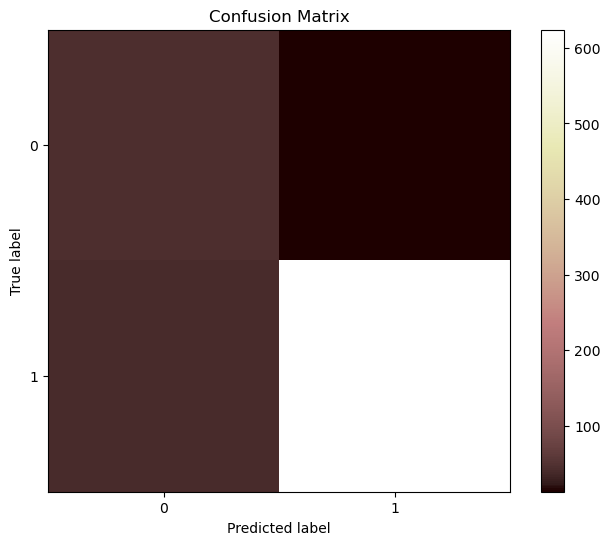

In [83]:
print(classification_report(y_test, pred_knnc))
confusion_mat = confusion_matrix(y_test, pred_knnc)

plt.figure(figsize=(8, 6))
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.imshow(confusion_mat, cmap=plt.cm.pink)
plt.xticks(range(len(set(y_test))), sorted(set(y_test)))
plt.yticks(range(len(set(y_test))), sorted(set(y_test)))
plt.colorbar()
plt.show()

In [84]:
knn_model, knn_train_auc, knn_test_auc, knn_train_accuracy, knn_test_accuracy,knn_f1, knn_precision,knn_recall= check_scores(knnc,x_smote,X_test)

The accuracy on train dataset is 0.9717757009345794
The accuracy on test dataset is 0.925414364640884

Train confusion matrix:
[[2665   10]
 [ 141 2534]]

Test confusion matrix:
[[ 46  13]
 [ 41 624]]

AUC on train data: 0.9987600663813433
AUC on test data: 0.8868357334012997
F1 score is: 0.9585253456221199
Precision is: 0.9795918367346939
Recall is: 0.9383458646616541


# **DECISION TREE CLASSIFIER**

In [85]:
dtc = DecisionTreeClassifier()
dtc.fit(x_smote,y_smote)
pred_dtc = dtc.predict(X_test)
accuracy_score(pred_dtc,y_test)


0.9696132596685083

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        59
           1       0.98      0.98      0.98       665

    accuracy                           0.97       724
   macro avg       0.90      0.89      0.90       724
weighted avg       0.97      0.97      0.97       724



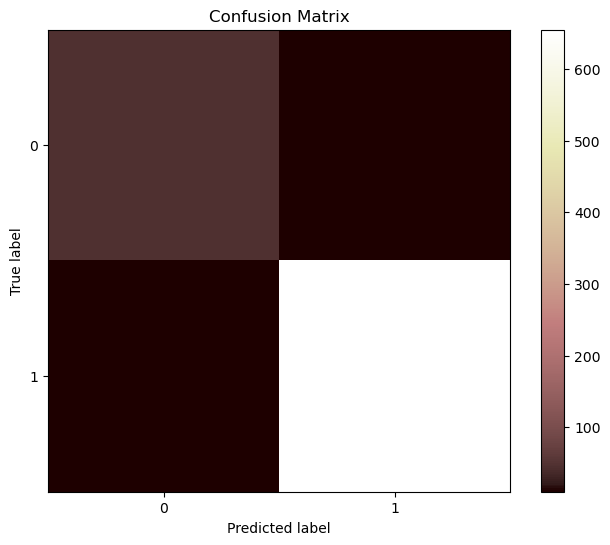

In [86]:
print(classification_report(y_test,pred_dtc))
confusion_mat = confusion_matrix(y_test, pred_dtc)

plt.figure(figsize=(8, 6))
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.imshow(confusion_mat, cmap=plt.cm.pink)
plt.xticks(range(len(set(y_test))), sorted(set(y_test)))
plt.yticks(range(len(set(y_test))), sorted(set(y_test)))
plt.colorbar()
plt.show()

In [87]:
dt_model, dt_train_auc, dt_test_auc, dt_train_accuracy, dt_test_accuracy,dt_f1, dt_precision,dt_recall= check_scores(dtc,x_smote,X_test)
#train = 1 means over fitting

The accuracy on train dataset is 1.0
The accuracy on test dataset is 0.9696132596685083

Train confusion matrix:
[[2675    0]
 [   0 2675]]

Test confusion matrix:
[[ 47  12]
 [ 10 655]]

AUC on train data: 1.0
AUC on test data: 0.8907862877532814
F1 score is: 0.9834834834834834
Precision is: 0.9820089955022488
Recall is: 0.9849624060150376


# **NAIVE BAYES**

In [88]:
nbc = GaussianNB()
nbc.fit(x_smote,y_smote)
pred_nbc = dtc.predict(X_test)
accuracy_score(pred_nbc,y_test)

0.9696132596685083

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        59
           1       0.98      0.98      0.98       665

    accuracy                           0.97       724
   macro avg       0.90      0.89      0.90       724
weighted avg       0.97      0.97      0.97       724



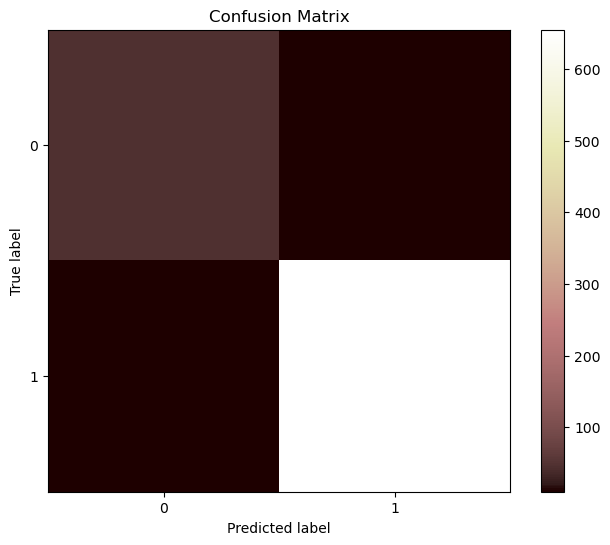

In [89]:
print(classification_report(y_test,pred_nbc))
confusion_mat = confusion_matrix(y_test, pred_nbc)

plt.figure(figsize=(8, 6))
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.imshow(confusion_mat, cmap=plt.cm.pink)
plt.xticks(range(len(set(y_test))), sorted(set(y_test)))
plt.yticks(range(len(set(y_test))), sorted(set(y_test)))
plt.colorbar()
plt.show()

In [90]:
nb_model, nb_train_auc, nb_test_auc, nb_train_accuracy, nb_test_accuracy,nb_f1, nb_precision,nb_recall= check_scores(nbc,x_smote,X_test)

The accuracy on train dataset is 0.5620560747663551
The accuracy on test dataset is 0.18370165745856354

Train confusion matrix:
[[2651   24]
 [2319  356]]

Test confusion matrix:
[[ 54   5]
 [586  79]]

AUC on train data: 0.9415897283605555
AUC on test data: 0.8072256913470115
F1 score is: 0.21094793057409883
Precision is: 0.9404761904761905
Recall is: 0.11879699248120301


# **XGBOOST**

In [91]:
xgbc = xgb.XGBClassifier()
xgbc.fit(x_smote,y_smote)
pred_xgbc = xgbc.predict(X_test)
accuracy_score(pred_xgbc,y_test)

0.9751381215469613

              precision    recall  f1-score   support

           0       0.82      0.90      0.85        59
           1       0.99      0.98      0.99       665

    accuracy                           0.98       724
   macro avg       0.90      0.94      0.92       724
weighted avg       0.98      0.98      0.98       724



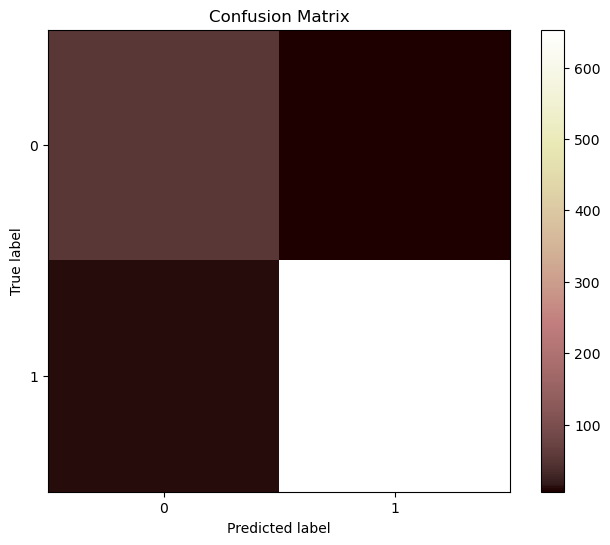

In [92]:
print(classification_report(y_test,pred_xgbc))
confusion_mat = confusion_matrix(y_test, pred_xgbc)

plt.figure(figsize=(8, 6))
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.imshow(confusion_mat, cmap=plt.cm.pink)
plt.xticks(range(len(set(y_test))), sorted(set(y_test)))
plt.yticks(range(len(set(y_test))), sorted(set(y_test)))
plt.colorbar()
plt.show()

In [93]:
xgb_model, xgb_train_auc, xgb_test_auc, xgb_train_accuracy, xgb_test_accuracy,xgb_f1, xgb_precision,xgb_recall= check_scores(xgbc,x_smote,X_test)

The accuracy on train dataset is 1.0
The accuracy on test dataset is 0.9751381215469613

Train confusion matrix:
[[2675    0]
 [   0 2675]]

Test confusion matrix:
[[ 53   6]
 [ 12 653]]

AUC on train data: 1.0
AUC on test data: 0.9894991716579585
F1 score is: 0.986404833836858
Precision is: 0.9908952959028832
Recall is: 0.9819548872180451


# **COMPARISON OF MODELS ACCURACY**

In [94]:
df_score = [('knn',knn_train_accuracy, knn_test_accuracy,knn_test_auc),('decision tree',dt_train_accuracy, dt_test_accuracy,dt_test_auc),('naive bayes',nb_train_accuracy, nb_test_accuracy,nb_test_auc),('xgboost',xgb_train_accuracy, xgb_test_accuracy,xgb_test_auc)]
df_score = pd.DataFrame(data = df_score,columns = ['Model Name','Train Accuracy','Test Accuracy','Test AUC Score'])
df_score.set_index('Model Name',inplace = True)


In [95]:
df_score.style.background_gradient(cmap ='PiYG')

,Train Accuracy,Test Accuracy,Test AUC Score
Model Name,,,
knn,0.971776,0.925414,0.886836
decision tree,1.000000,0.969613,0.890786
naive bayes,0.562056,0.183702,0.807226
xgboost,1.000000,0.975138,0.989499


In [96]:
cdf

,age,sex,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,label
0,41,F,f,f,f,f,f,f,f,1.300000,2.5000,125,1.140,109,P
1,23,F,f,f,f,f,f,f,f,4.100000,2.0000,102,0.995,110,P
2,46,M,f,f,f,f,f,f,f,0.980000,2.0135,109,0.910,120,P
3,70,F,f,f,f,f,f,f,f,0.160000,1.9000,175,0.995,110,P
4,70,F,f,f,f,f,f,f,f,0.720000,1.2000,61,0.870,70,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3615,30,F,f,f,f,f,f,f,t,5.086766,2.0135,108,0.995,110,P
3616,68,F,f,f,f,f,f,f,f,1.000000,2.1000,124,1.080,114,P
3617,74,F,f,f,f,f,f,f,f,5.100000,1.8000,112,1.070,105,P
3618,72,M,f,f,f,f,f,f,f,0.700000,2.0000,82,0.940,87,P


In [97]:
#creating pickle file

pickle.dump(pipeline,open('finalmodel.pkl','wb'))
